In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle

In [89]:
# Load the dataset
file_path = 'disease_symptom_data.csv'  # Replace with your Colab file path
disease_symptom_df = pd.read_csv(file_path)
disease_symptom_df

,disease_id,d_name,symptom_id,s_name
0,C0020538,Hypertensive Disease,C0008031,Pain Chest
1,C0020538,Hypertensive Disease,C0392680,Shortness Of Breath
2,C0020538,Hypertensive Disease,C0012833,Dizziness
3,C0020538,Hypertensive Disease,C0004093,Asthenia
4,C0020538,Hypertensive Disease,C0085639,Fall
...,...,...,...,...
1901,C0233472,Affect Labile,C0741453,Bedridden
1902,C0233472,Affect Labile,C0242453,Prostatism
1903,C0011127,Decubitus Ulcer,C0232257,Systolic Murmur
1904,C0011127,Decubitus Ulcer,C0871754,Frail


In [90]:
# One-hot encoding for symptoms
binary_features = pd.get_dummies(disease_symptom_df['symptom_id'])
disease_symptom_hotcoded = pd.concat(
    [disease_symptom_df['disease_id'], binary_features],
    axis=1
).groupby('disease_id').sum().reset_index()

# Display disease_symptom_hotcoded
disease_symptom_hotcoded

,disease_id,C0000727,C0000731,C0000737,C0002416,C0002962,C0003123,C0003126,C0003862,C0003962,...,C1320716,C1321756,C1384489,C1384606,C1405524,C1444773,C1456822,C1511606,C1513183,C1517205
0,C0001175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C0001418,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C0001511,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C0001973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C0002395,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C1258215,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,C1456784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,C1510475,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
131,C1565489,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
file_path = 'disease_symptom_hotcoded_train.csv'
disease_symptom_df_train = pd.read_csv(file_path)
disease_symptom_df_train

,disease_id,C0000727,C0000731,C0000737,C0002416,C0002962,C0003123,C0003126,C0003862,C0003962,...,C1320716,C1321756,C1384489,C1384606,C1405524,C1444773,C1456822,C1511606,C1513183,C1517205
0,C0001175,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,C0001418,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,C0001511,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C0001973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C0002395,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C0024228,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4996,C0024299,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,C0024713,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4998,C0025202,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Encode labels (diseases)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(disease_symptom_df_train['disease_id'])
y_categorical = to_categorical(y)  # Convert to categorical format

In [93]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [94]:
# Prepare features
X = disease_symptom_df_train.drop(['disease_id'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [96]:
# Build the Dense Neural Network model
model = Sequential([
    # Input layer
    Input(shape=(X_train.shape[1],)),

    # Hidden layers with Batch Normalization and Dropout
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Output layer
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model with Adam optimizer and learning rate decay
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [97]:
# Train the model with class weights
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, class_weight=class_weights_dict)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.0064 - loss: 5.6483 - val_accuracy: 0.0125 - val_loss: 4.9667
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0077 - loss: 5.3660 - val_accuracy: 0.0050 - val_loss: 5.0061
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0200 - loss: 5.0472 - val_accuracy: 0.0100 - val_loss: 5.0364
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0313 - loss: 4.8845 - val_accuracy: 0.0075 - val_loss: 5.0447
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0355 - loss: 4.7216 - val_accuracy: 0.0075 - val_loss: 5.0428
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0544 - loss: 4.5327 - val_accuracy: 0.0075 - val_loss: 5.0579
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0547 - loss: 4.4621 - val_accuracy: 0.0075 - val_loss: 5.0744
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0775 - loss: 4.2890 - val_a

In [98]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=5)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 9.337736129760742
Test Accuracy: 0.008999999612569809


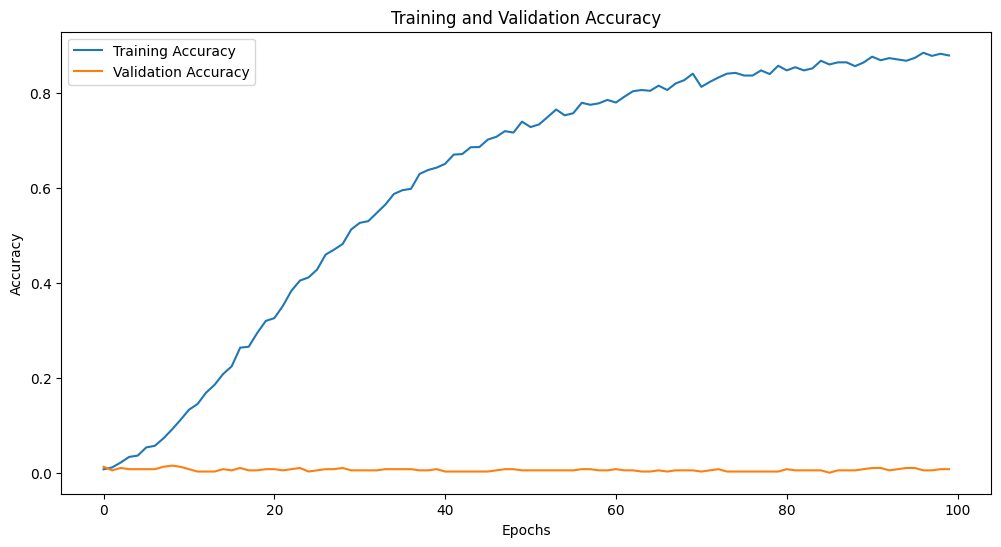

In [99]:
# Visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

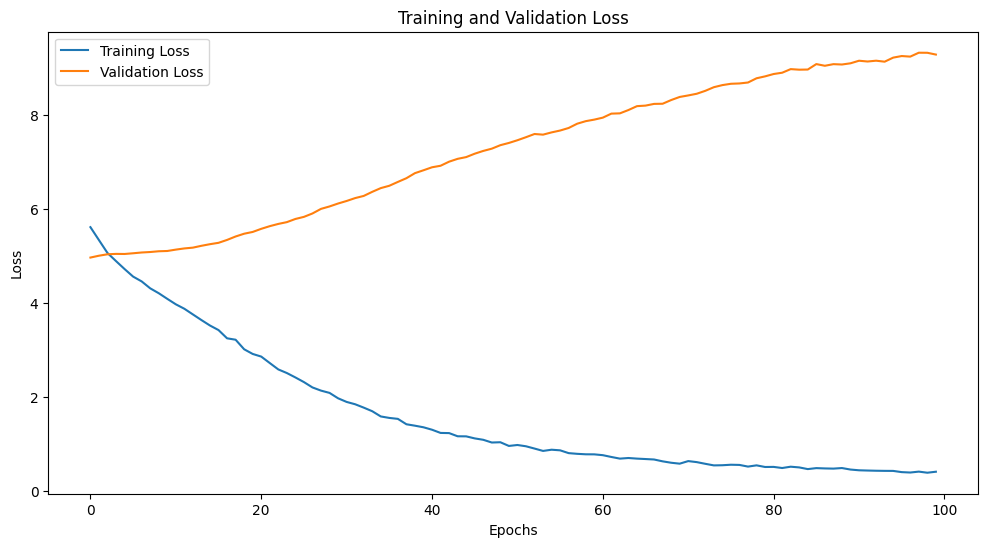

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [101]:
# Save the trained model to a file
model.save('disease_prediction_model.h5')  # Save as HDF5 format

In [102]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = load_model('disease_prediction_model.h5')

In [103]:
# Load the dataset for reference
file_path = 'disease_symptom_data.csv'  # Replace with the actual file path
disease_symptom_df = pd.read_csv(file_path)

# Prepare the scaler using the original training data
binary_features = pd.get_dummies(disease_symptom_df['symptom_id'])
disease_symptom_hotcoded = pd.concat(
    [disease_symptom_df['disease_id'], binary_features],
    axis=1
).groupby('disease_id').sum().reset_index()

X = disease_symptom_hotcoded.drop(['disease_id'], axis=1)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [104]:
# Define selected symptoms
selectedSymptoms = ['C0474395', 'C0241158', 'C0231807', 'C0520966', 'C0231528', 'C0020440', 'C0392162', 'C0557075', 'C0848277', 'C0859032', 'C0028081', 'C0006625', 'C0436331', 'C0013404', 'C0034642', 'C0016382', 'C0221150', 'C0003862', 'C0008301', 'C0232726', 'C0009806']

# Print input symptoms with their names
print("Input Symptoms:")
for symptom_id in selectedSymptoms:
    symptom_name = disease_symptom_df.loc[disease_symptom_df['symptom_id'] == symptom_id, 's_name'].values
    symptom_name = symptom_name[0] if len(symptom_name) > 0 else "Unknown Symptom"
    print(f"Symptom ID: {symptom_id}, Name: {symptom_name}")

# Create test input in the same format as the training data
test_input = pd.DataFrame([{symptom_id: 1 for symptom_id in selectedSymptoms}], columns=X.columns).fillna(0)
test_input_scaled = scaler.transform(test_input)

# Make predictions using the trained model
probabilities = model.predict(test_input_scaled)
top_indices = np.argsort(probabilities[0])[-3:][::-1]  # Top 3 probabilities
top_diseases = [disease_symptom_df.loc[disease_symptom_df['disease_id'] == disease_id, 'd_name'].values[0]
                if len(disease_symptom_df.loc[disease_symptom_df['disease_id'] == disease_id, 'd_name'].values) > 0 else "Unknown Disease"
                for disease_id in np.array(disease_symptom_hotcoded['disease_id'])[top_indices]]
top_probabilities = [probabilities[0][i] for i in top_indices]

# Print top 3 predicted diseases
print("\nTop 3 Predicted Diseases:")
for i in range(len(top_diseases)):
    print(f"Disease ID: {top_indices[i]}, Name: {top_diseases[i]}, Probability: {top_probabilities[i]}")


Input Symptoms:
Symptom ID: C0474395, Name: Behavior Showing Increased Motor Activity
Symptom ID: C0241158, Name: Scar Tissue
Symptom ID: C0231807, Name: Dyspnea On Exertion
Symptom ID: C0520966, Name: Coordination Abnormal
Symptom ID: C0231528, Name: Myalgia
Symptom ID: C0020440, Name: Hypercapnia
Symptom ID: C0392162, Name: Clammy Skin
Symptom ID: C0557075, Name: Has Religious Belief
Symptom ID: C0848277, Name: Room Spinning
Symptom ID: C0859032, Name: Moan
Symptom ID: C0028081, Name: Night Sweat
Symptom ID: C0006625, Name: Cachexia
Symptom ID: C0436331, Name: Symptom Aggravating Factors
Symptom ID: C0013404, Name: Dyspnea
Symptom ID: C0034642, Name: Rale
Symptom ID: C0016382, Name: Flushing
Symptom ID: C0221150, Name: Painful Swallowing
Symptom ID: C0003862, Name: Arthralgia
Symptom ID: C0008301, Name: Choke
Symptom ID: C0232726, Name: Tenesmus
Symptom ID: C0009806, Name: Constipation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

Top 3 Predicted Diseases:
Disease ID: 56, Name: Herniahiata

In [105]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    # Save binary_features
with open('binary_features.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)


In [106]:
import tensorflow as tf
print(tf.__version__)


2.18.0
